# ggplot2

[ggplot2](http://ggplot2.tidyverse.org/reference/) é um sistema para criar gráficos de forma declarativa, baseado em [grámaticas de gráficos](https://www.amazon.com/Grammar-Graphics-Statistics-Computing/dp/0387245448/ref=as_li_ss_tl?ie=UTF8&qid=1477928463&sr=8-1&keywords=the+grammar+of+graphics&linkCode=sl1&tag=ggplot2-20&linkId=f0130e557161b83fbe97ba0e9175c431). Você provê o dado, dizendo ao ggplot2 como mapeá-los a elementos estéticos, quais primitivas gráficas utilizar, e ele cuida dos detalhes técnicos.

## O que é gramática de gráficos?

A ideia básica é: independemente especificar *building blocks* do plot e combiná-los para criar qualquer tipo de gráfico. Os building blocks são:

- dados
- mapa estético
- objeto geométrico
- transformação estatística
- escalas
- sistemas de cooredenadas
- ajustes de posição
- faceting

In [1]:
# install.packages("ggplot2")
library("ggplot2")

In [3]:
set.seed(10)

X = abs(rnorm(100, 60, 500))
X[X <= 40] = 40
w = 2000
y = X * df.(w - rnorm(length(X), 0, 500)) + 60000

df = data.frame(area = X, preco = y)
head(df)

area,preco
69.37309,225170.5
40.00000,131612.5
625.66527,1636658.8
239.58386,453926.9
207.27256,540169.0
254.89715,498018.5


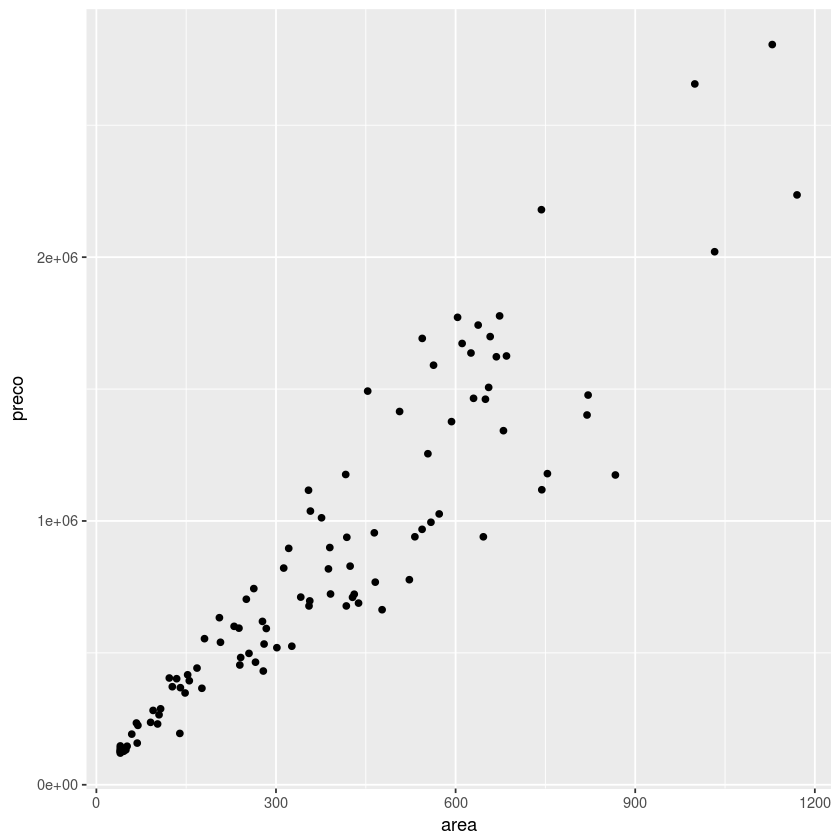

In [9]:
ggplot(df, aes(x = area, y = preco)) +
geom_point()

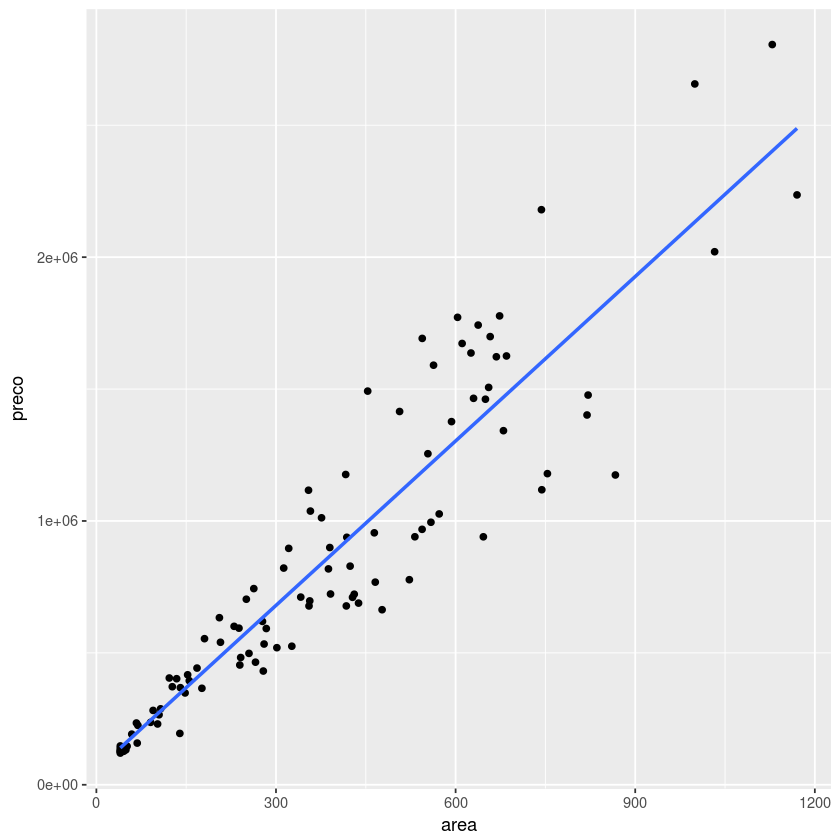

In [13]:
ggplot(df, aes(x = area, y = preco)) + 
     geom_point()  +
    geom_smooth(method='lm', se = FALSE)

Warning message:
“Ignoring unknown parameters: shape”

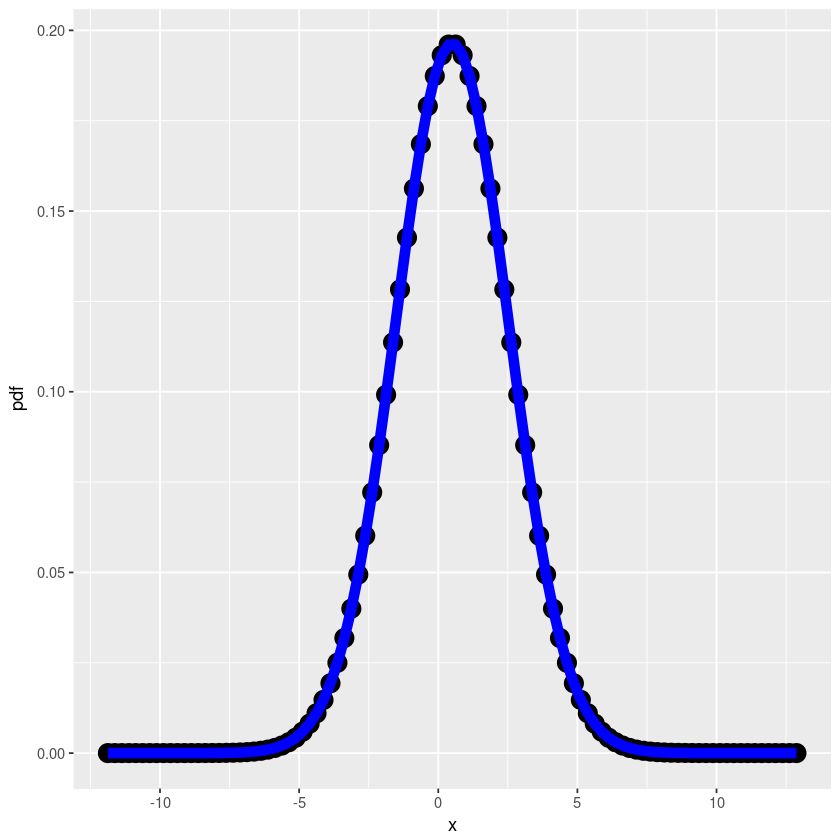

In [26]:
mu = 0.5
varianca = 4.124
sigma = sqrt(varianca)
x = seq(mu - 3*varianca, mu + 3*varianca, length.out=100)

# plotando uma distribuição normal
df = data.frame(pdf=dnorm(x, mu, sigma), x=x)

ggplot(df, aes(x = x, y = pdf)) +
        geom_point( size=5) + 
geom_line(color="blue", size=3, shape=25) 

## Objetos Geométricos e Mapas Estéticos

### Mapa Estétisco

No ggplot estéticos (a.k.a. aesthetic) significa tudo que você pode ver. Por exemplo:

- posição (i.e., nos eixos x e y)
- cor (color) 
- preenchimento (fill)
- formato dos pontos (shape)
- tipo da linha (linetype)
- tamanho (size)

In [27]:
iris = read.csv("../aula_02/dados/iris-dataset.csv")

colnames(iris) = c("sepal_length", "sepal_width", "petal_length", "petal_width", "species")

head(iris)

sepal_length,sepal_width,petal_length,petal_width,species
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa
4.6,3.4,1.4,0.3,Iris-setosa


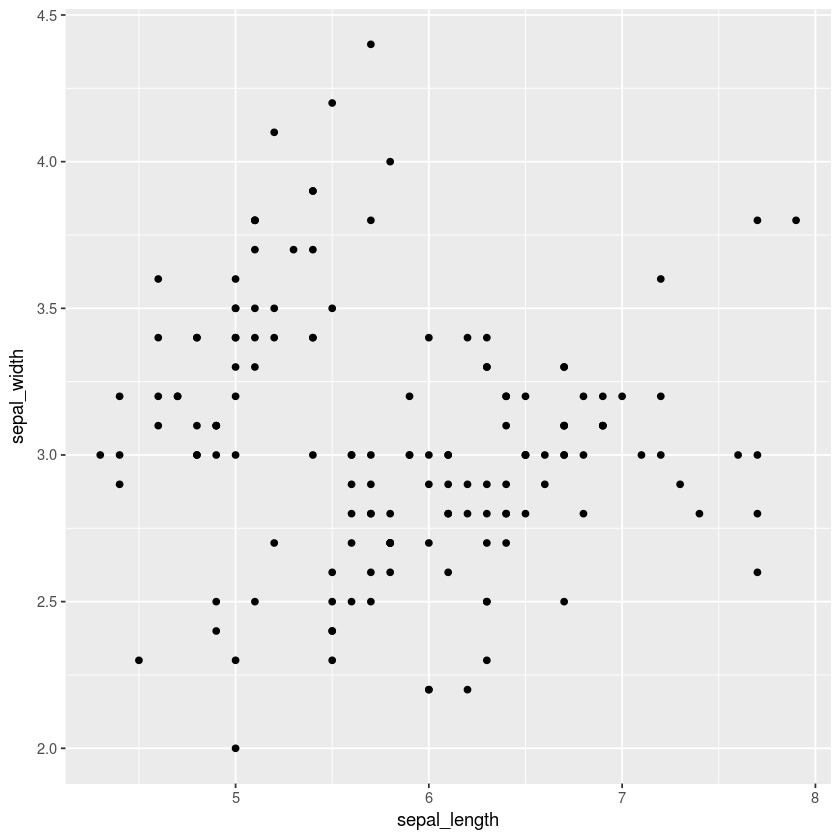

In [28]:
ggplot(iris, aes(x = sepal_length,
                 y =sepal_width)) +
 geom_point()

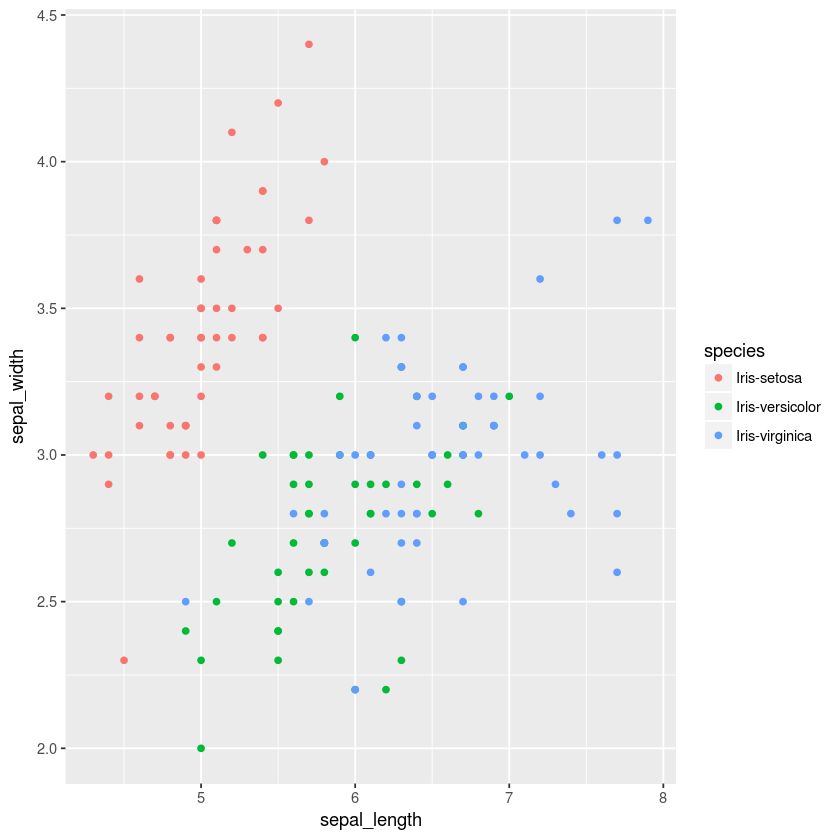

In [32]:
# adcione os seguintes aesthetic: size=petal_width, shape=species
ggplot(iris, aes(x = sepal_length,
                 y = sepal_width, 
                 color=species)) +
 geom_point()

## Objectos Geométricos (geom)

Objetos geométricos são o que é de fato traçado. Exemplos são:

- pontos (geom_point, para gráficos de dispersão)
- linhas (geom_line, para time series, tendências, etc)
- boxplot (geom_boxplot)

Um gráfico deve ter pelo menos um geom; não quantidade máxima. Você pode adicionar geom ao seu gráfico com operador **+** .

Você pode listar os objetos geométricos disponíveis abaixo:

In [34]:
help.search("geom_", package = "ggplot2")

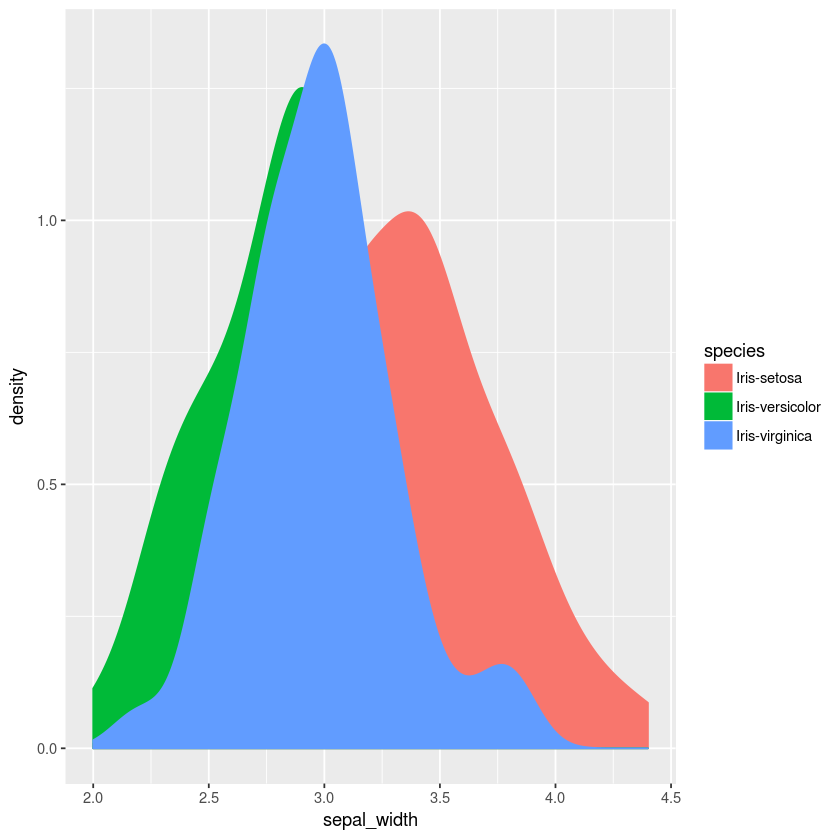

In [40]:
ggplot(iris, aes(x=sepal_width,
                 fill=species,
                 color=species)) + 
geom_density()

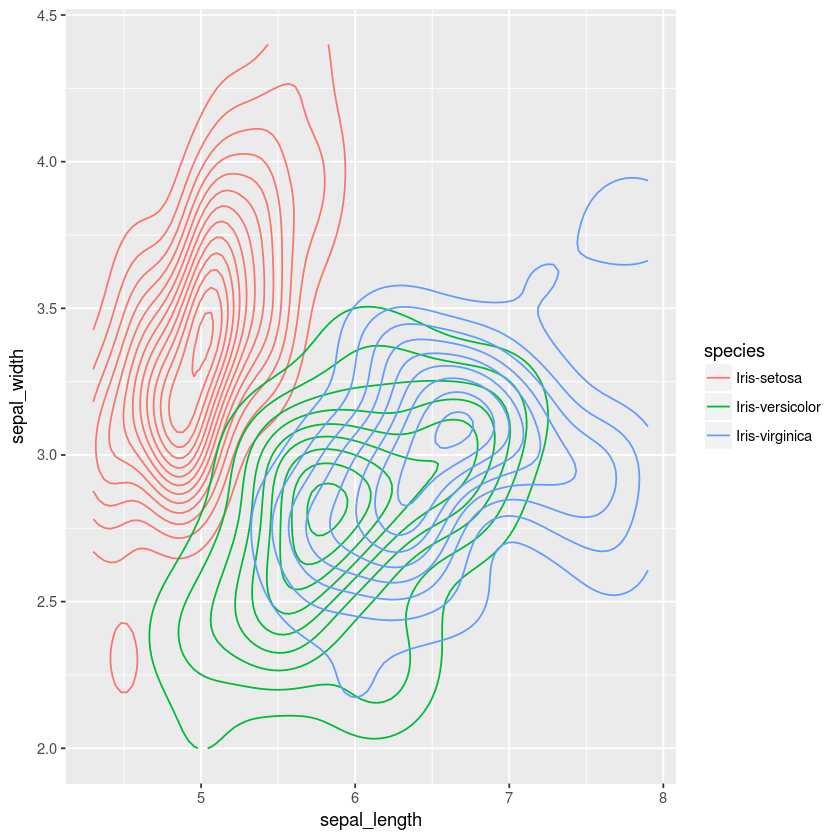

In [42]:
ggplot(iris, aes(x = sepal_length, 
                 y = sepal_width,
                color=species,
                fill=species)) + 
geom_density_2d()

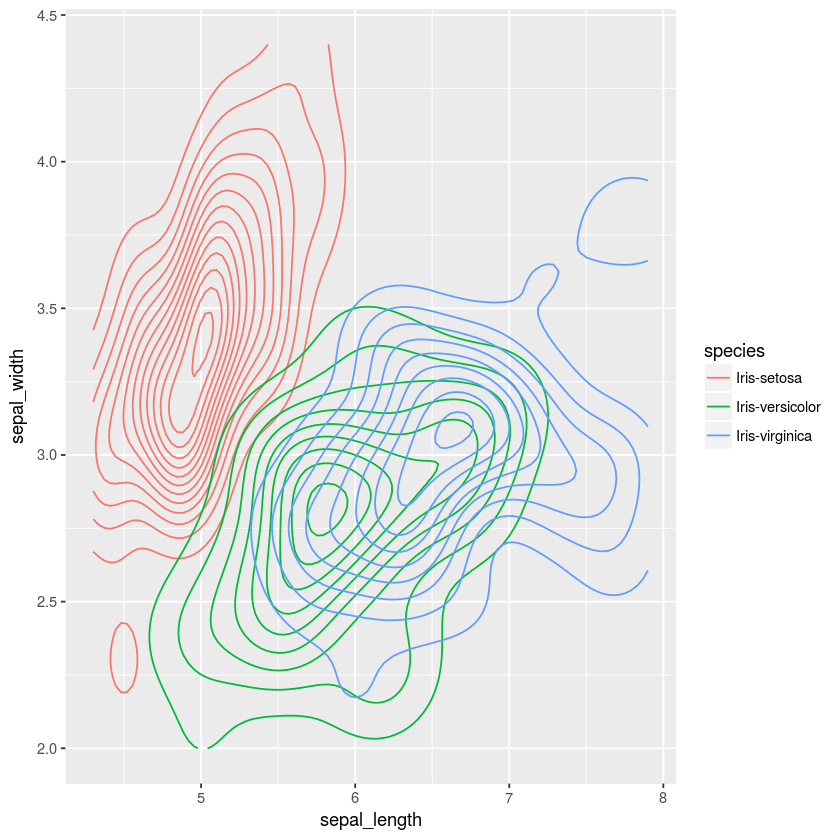

In [14]:
ggplot(iris, aes(x=sepal_length, y = sepal_width, color=species)) + 
geom_density_2d()

## Boxplot

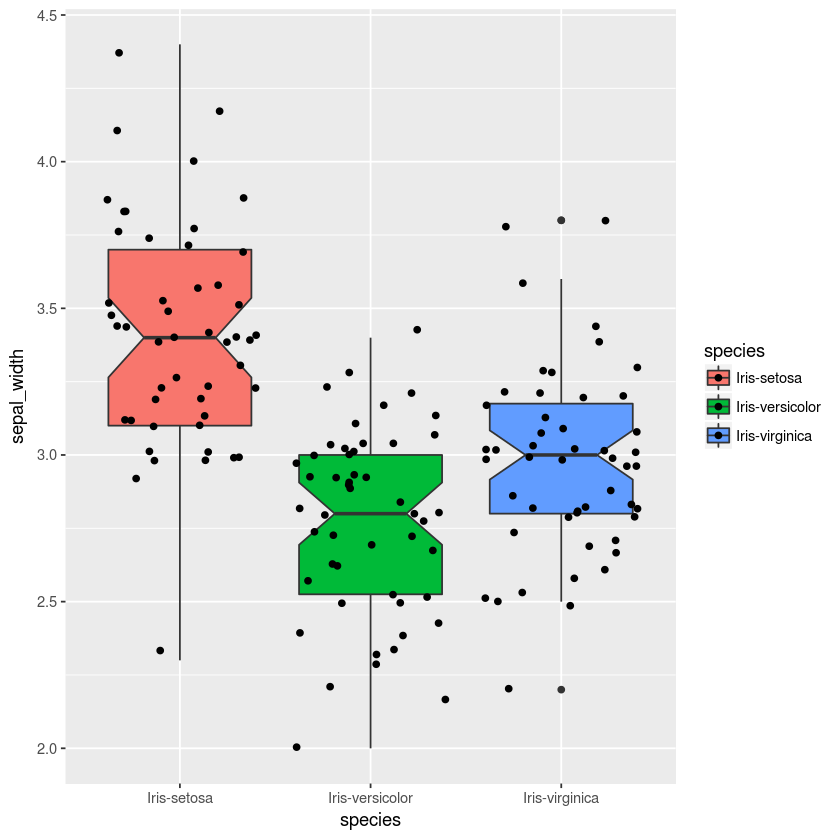

In [56]:
ggplot(iris, aes(x=species,
                 y=sepal_width,
                 fill=species)) + 
geom_boxplot(notch=TRUE) +
geom_jitter()

## Violin

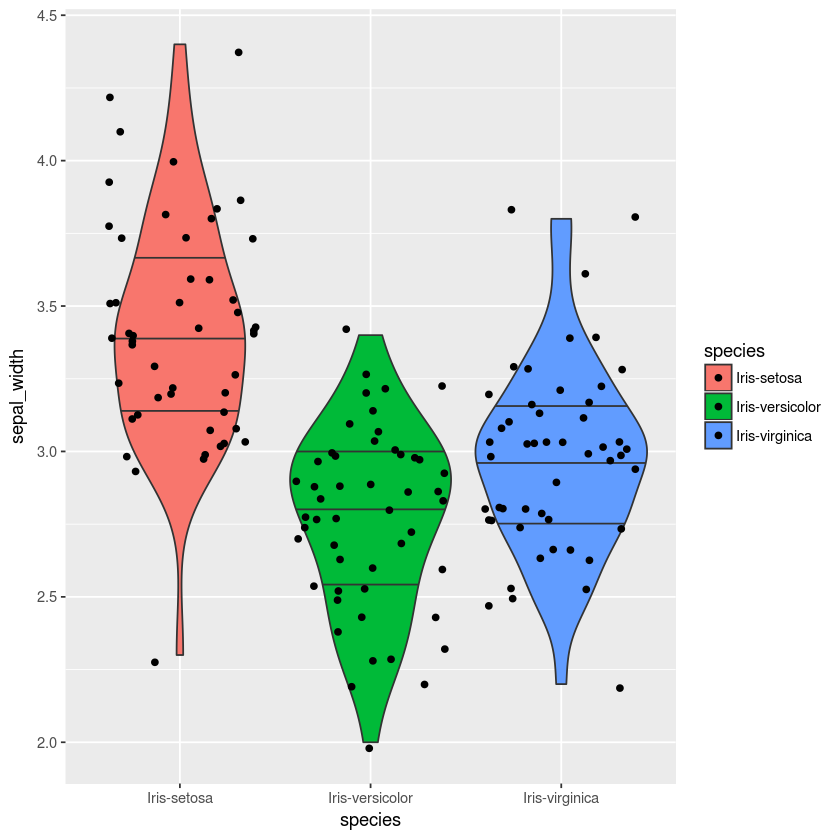

In [57]:
ggplot(iris, aes(x=species, 
                 y=sepal_width, 
                 fill=species)) + 
geom_violin(
    draw_quantiles=c(0.25, 0.5, 0.75)) +
geom_jitter()

## Faceting

In [76]:

ggplot(iris, aes(sepal_length,
                      sepal_width, 
                      color=species)) + 
geom_density_2d() +
facet_wrap(~ species, ncol=1)

dev.off()

ERROR: Error in parse(text = x, srcfile = src): <text>:1:1: unexpected SPECIAL
1: %%
    ^


In [77]:
?ggplot

## PairGrid

In [66]:
install.packages("GGally")
library("GGally")

Installing package into ‘/home/osboxes/R/i686-pc-linux-gnu-library/3.2’
(as ‘lib’ is unspecified)
also installing the dependencies ‘assertthat’, ‘prettyunits’, ‘progress’, ‘reshape’




The downloaded source packages are in
	‘/tmp/RtmpfoxKI3/downloaded_packages’


Warning message:
“replacing previous import by ‘utils::capture.output’ when loading ‘GGally’”Warning message:
“replacing previous import by ‘utils::head’ when loading ‘GGally’”Warning message:
“replacing previous import by ‘utils::installed.packages’ when loading ‘GGally’”Warning message:
“replacing previous import by ‘utils::str’ when loading ‘GGally’”

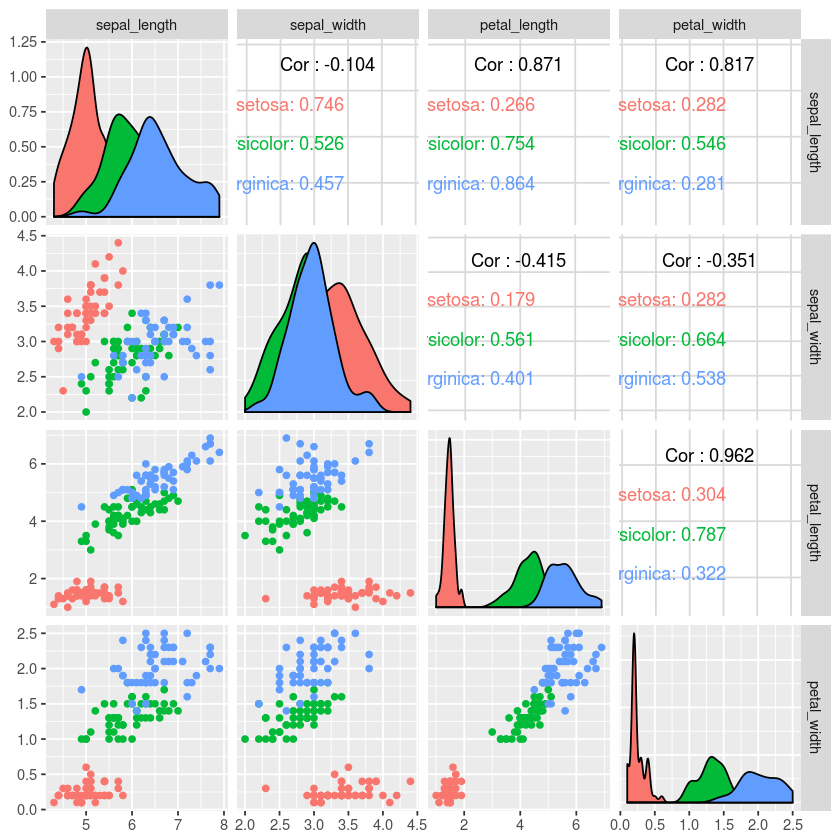

In [68]:
ggpairs(data=iris, 
        columns=1:4,
       mapping=aes(color=species))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


null device 
          1

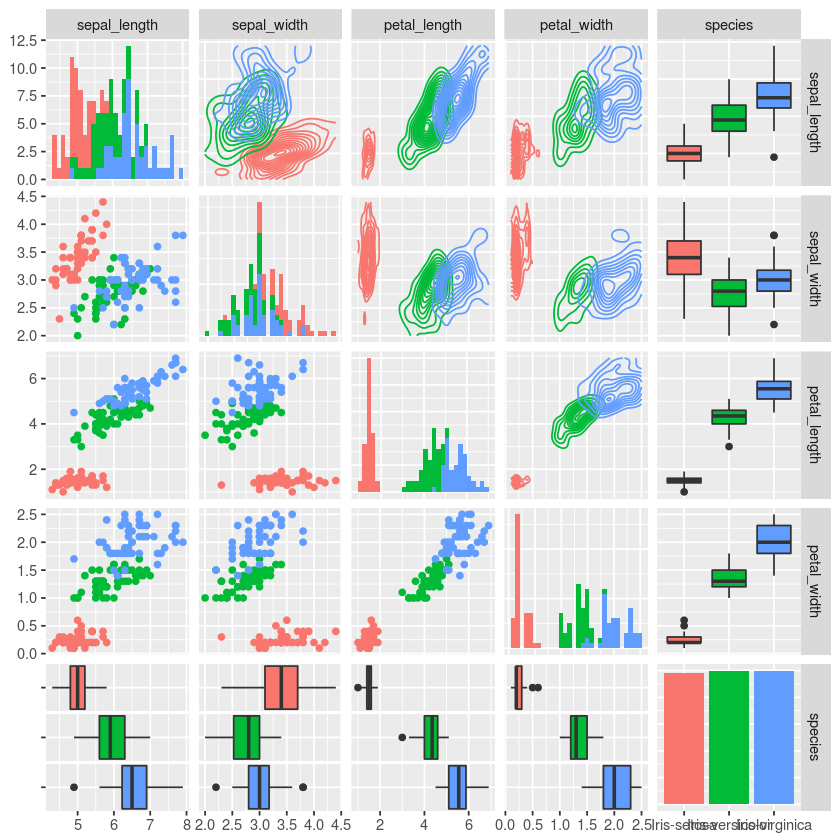

In [74]:

ggpairs(data=iris, 
        columns=1:5, 
        mapping=aes(color=species),
       upper=list(continuous = "density"),
       lower=list(combo = "box"),
       diag=list(continuous="barDiag"))

dev.off()

## Exercício

Quero que você faça uma análise da tragédia do Titanic, verifique quais são as características mais importantes para a morte de um indivíduo nessa tragédia. Para isso, você vai utilizar os dados que estão no arquivo **titanic.csv** na pasta **dados**. Esses dados foram retirados da plataforma Kaggle, para maiores informações sobre as colunas e seus valores acessar [aqui](https://www.kaggle.com/c/titanic/data).

In [78]:
df = read.csv("dados/titanic.csv")
head(df)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


In [79]:
colnames(df)

[1] "PassengerId" "Survived"    "Pclass"      "Name"        "Sex"        
 [6] "Age"         "SibSp"       "Parch"       "Ticket"      "Fare"       
[11] "Cabin"       "Embarked"

In [80]:
summary(df)

  PassengerId       Survived          Pclass     
 Min.   :  1.0   Min.   :0.0000   Min.   :1.000  
 1st Qu.:223.5   1st Qu.:0.0000   1st Qu.:2.000  
 Median :446.0   Median :0.0000   Median :3.000  
 Mean   :446.0   Mean   :0.3838   Mean   :2.309  
 3rd Qu.:668.5   3rd Qu.:1.0000   3rd Qu.:3.000  
 Max.   :891.0   Max.   :1.0000   Max.   :3.000  
                                                 
                                    Name         Sex           Age       
 Abbing, Mr. Anthony                  :  1   female:314   Min.   : 0.42  
 Abbott, Mr. Rossmore Edward          :  1   male  :577   1st Qu.:20.12  
 Abbott, Mrs. Stanton (Rosa Hunt)     :  1                Median :28.00  
 Abelson, Mr. Samuel                  :  1                Mean   :29.70  
 Abelson, Mrs. Samuel (Hannah Wizosky):  1                3rd Qu.:38.00  
 Adahl, Mr. Mauritz Nils Martin       :  1                Max.   :80.00  
 (Other)                              :885                NA's   :177    
     Sib

In [83]:
df$Pclass = factor(df$Pclass)
df$Survived = factor(df$Survived)

In [84]:
summary(df)

  PassengerId    Survived Pclass                                     Name    
 Min.   :  1.0   0:549    1:216   Abbing, Mr. Anthony                  :  1  
 1st Qu.:223.5   1:342    2:184   Abbott, Mr. Rossmore Edward          :  1  
 Median :446.0            3:491   Abbott, Mrs. Stanton (Rosa Hunt)     :  1  
 Mean   :446.0                    Abelson, Mr. Samuel                  :  1  
 3rd Qu.:668.5                    Abelson, Mrs. Samuel (Hannah Wizosky):  1  
 Max.   :891.0                    Adahl, Mr. Mauritz Nils Martin       :  1  
                                  (Other)                              :885  
     Sex           Age            SibSp           Parch             Ticket   
 female:314   Min.   : 0.42   Min.   :0.000   Min.   :0.0000   1601    :  7  
 male  :577   1st Qu.:20.12   1st Qu.:0.000   1st Qu.:0.0000   347082  :  7  
              Median :28.00   Median :0.000   Median :0.0000   CA. 2343:  7  
              Mean   :29.70   Mean   :0.523   Mean   :0.3816   3

Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Removed 15 rows containing non-finite values (stat_boxplot).”

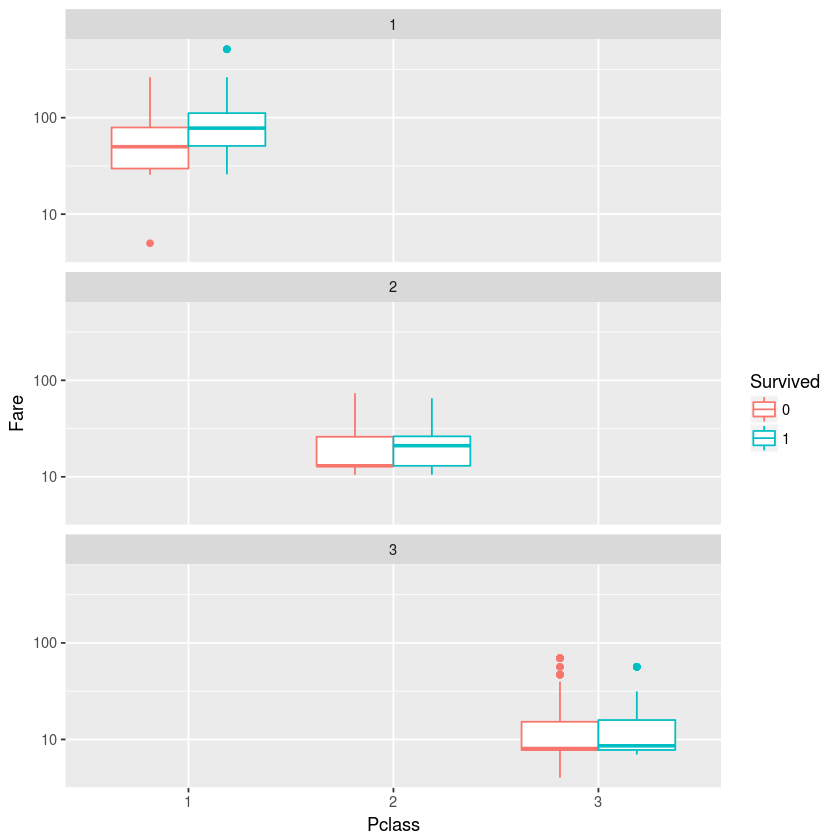

In [117]:
ggplot(df, aes(x = Pclass,
               y = Fare,
               color = Survived)) + 
    geom_boxplot() + 

facet_wrap(~Pclass, ncol=1) + 
scale_y_log10()

In [104]:
valor = tapply(df$Fare, df$Pclass, 
       FUN=function(x) {
           (x - min(x)) / (max(x) - min(x))
       })

In [106]:
df$scaledFare = NA
df[df$Pclass == '1',]$scaledFare = valor$`1`
df[df$Pclass == '2',]$scaledFare = valor$`2`
df[df$Pclass == '3',]$scaledFare = valor$`3`

notch went outside hinges. Try setting notch=FALSE.
notch went outside hinges. Try setting notch=FALSE.
notch went outside hinges. Try setting notch=FALSE.


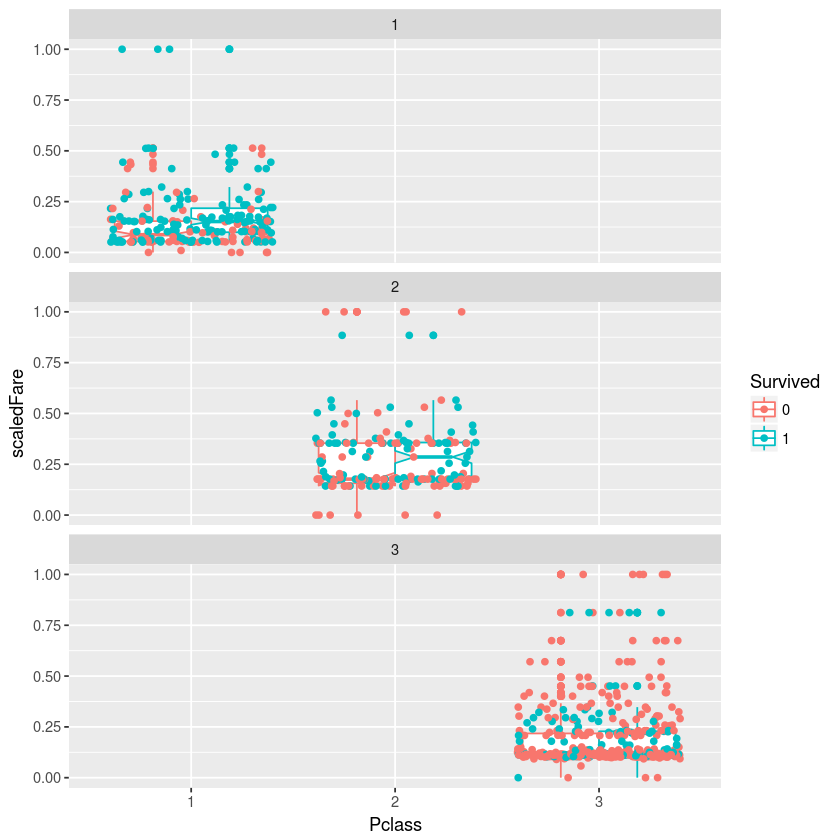

In [111]:
ggplot(df, aes(x = Pclass,
               y = scaledFare,
               color = Survived)) + 
    geom_boxplot(notch=TRUE) + 
geom_jitter() +
facet_wrap(~Pclass, ncol=1) 

Warning message:
“Removed 177 rows containing non-finite values (stat_ydensity).”Warning message:
“Removed 177 rows containing non-finite values (stat_boxplot).”

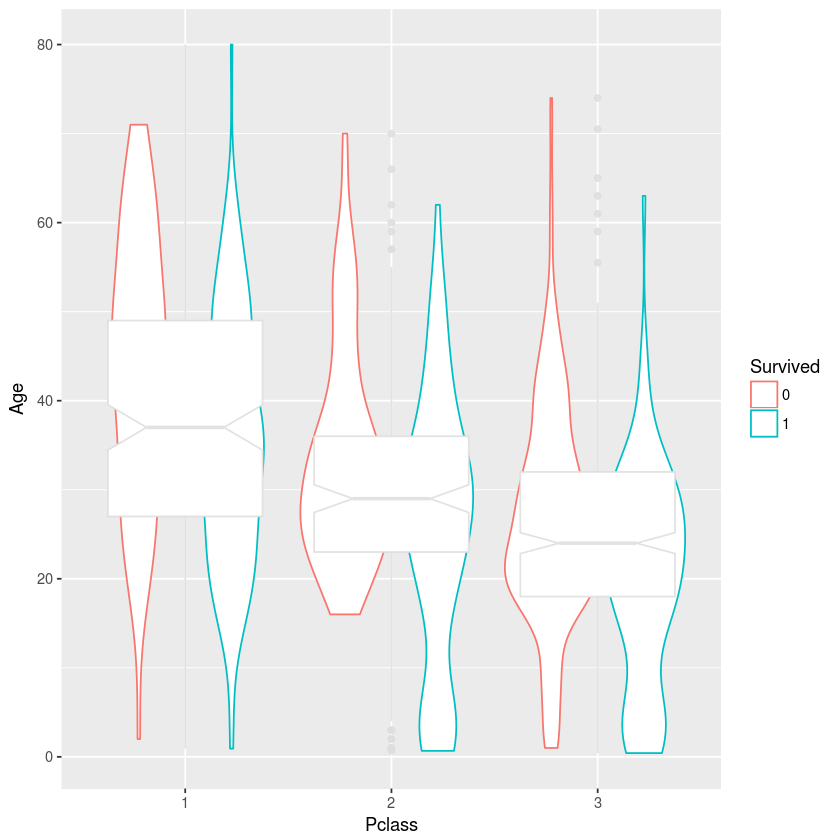

In [122]:
ggplot(df, aes(x = Pclass,
               y = Age,
               color = Survived)) + 
    geom_violin() + 
geom_boxplot(notch=TRUE, color="#dddddddd") 

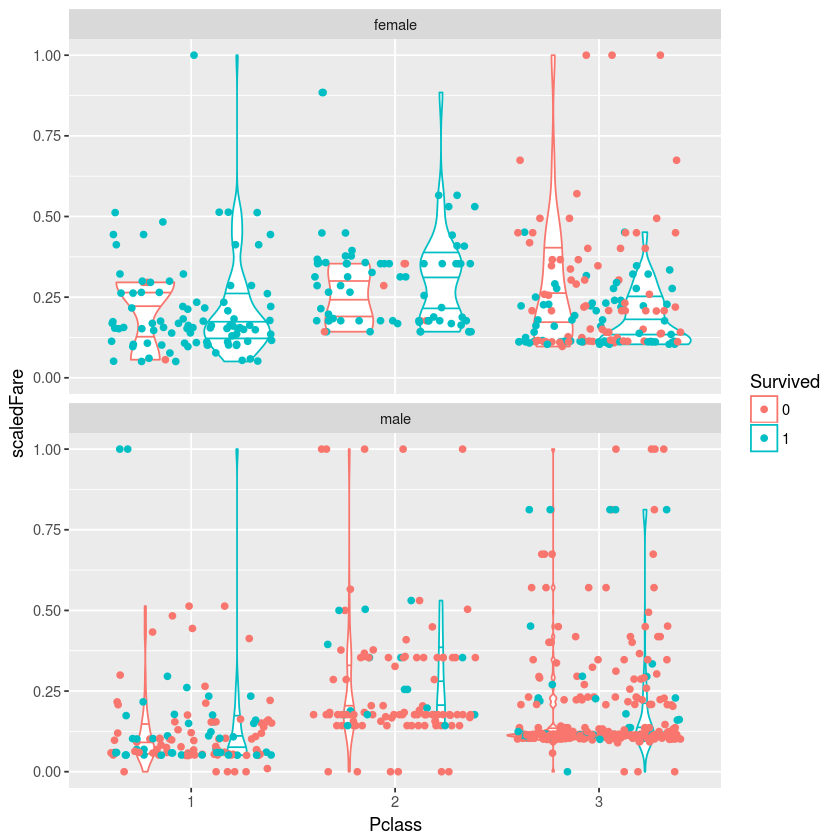

In [129]:
ggplot(df, aes(x = Pclass,
               y = scaledFare,
               color = Survived)) + 
    geom_violin(draw_quantiles=c(0.25,0.5,0.75)) + 
geom_jitter() + 
facet_wrap(~ Sex, ncol=1) 

In [134]:
aggregate(Survived ~ Sex + Pclass, df, 
          function(x) sum(x == 1) / length(x))

Sex,Pclass,Survived
female,1,0.9680851
male,1,0.3688525
female,2,0.9210526
male,2,0.1574074
female,3,0.5000000
male,3,0.1354467


In [135]:
df$faixa.etaria = NA

In [137]:
df = df[!is.na(df$Age), ]

In [138]:
df[df$Age < 15, "faixa.etaria"] = "crianca"
df[(df$Age >= 15) & (df$Age <= 45), "faixa.etaria"] = "adulto"
df[df$Age > 45, "faixa.etaria"] = "idoso"

In [140]:
aggregate(Survived ~ Sex + Pclass + faixa.etaria, df, 
          function(x) sum(x == 1) / length(x))

Sex,Pclass,faixa.etaria,Survived
female,1,adulto,0.98412698
male,1,adulto,0.46428571
female,2,adulto,0.91228070
male,2,adulto,0.06756757
female,3,adulto,0.45833333
male,3,adulto,0.13744076
female,1,crianca,0.50000000
male,1,crianca,1.00000000
female,2,crianca,1.00000000
male,2,crianca,1.00000000
